In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)
%matplotlib inline

In [2]:
#import iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8]

 For n_clusters = 2 , The average silhouette_score = 0.681046169211746
 For n_clusters = 3 , The average silhouette_score = 0.5528190123564091
 For n_clusters = 4 , The average silhouette_score = 0.4980505049972866
 For n_clusters = 5 , The average silhouette_score = 0.4887488870931048
 For n_clusters = 6 , The average silhouette_score = 0.3678464984712235
 For n_clusters = 7 , The average silhouette_score = 0.3588294450965675
 For n_clusters = 8 , The average silhouette_score = 0.34901133143367136


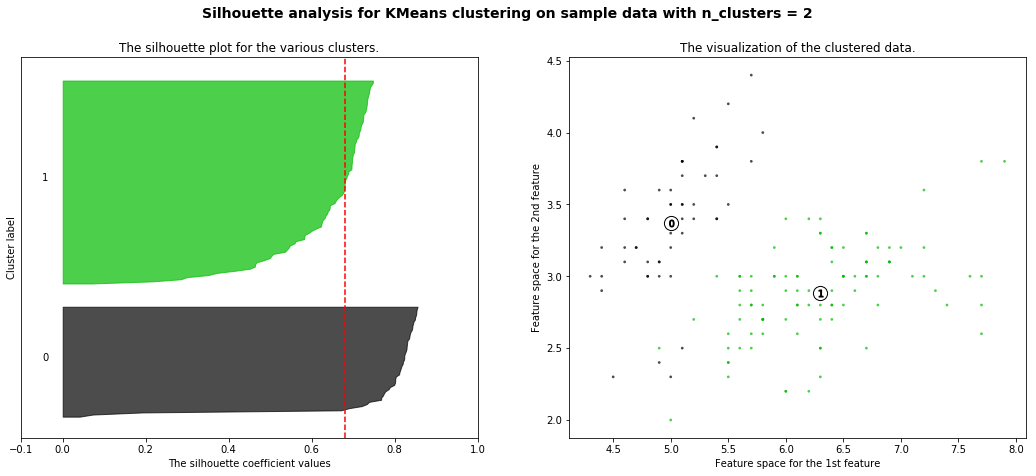

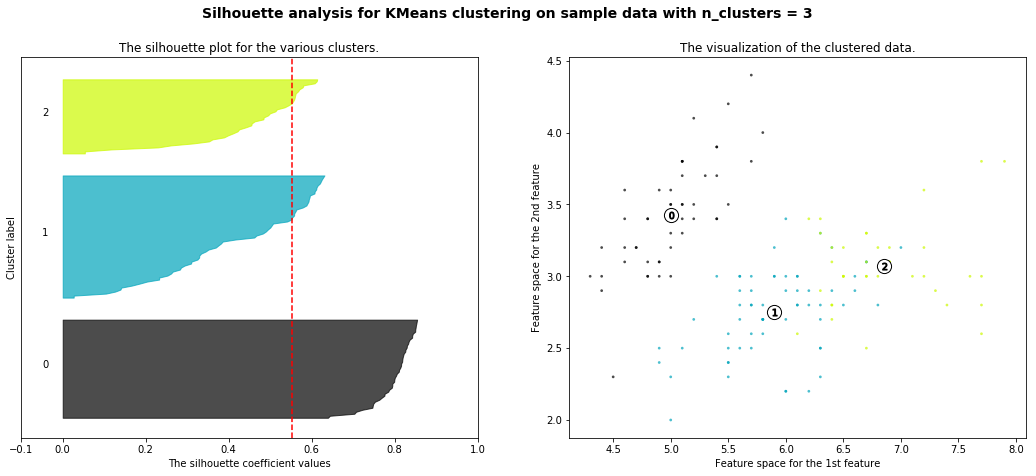

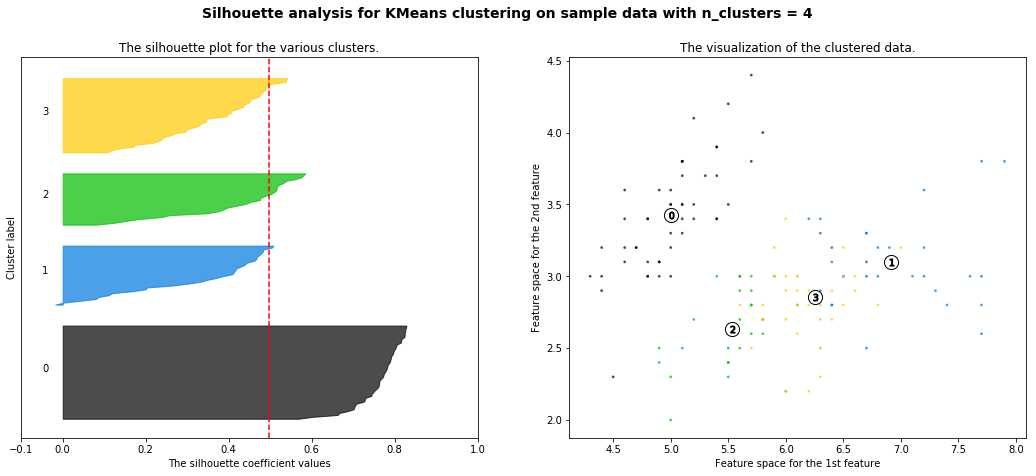

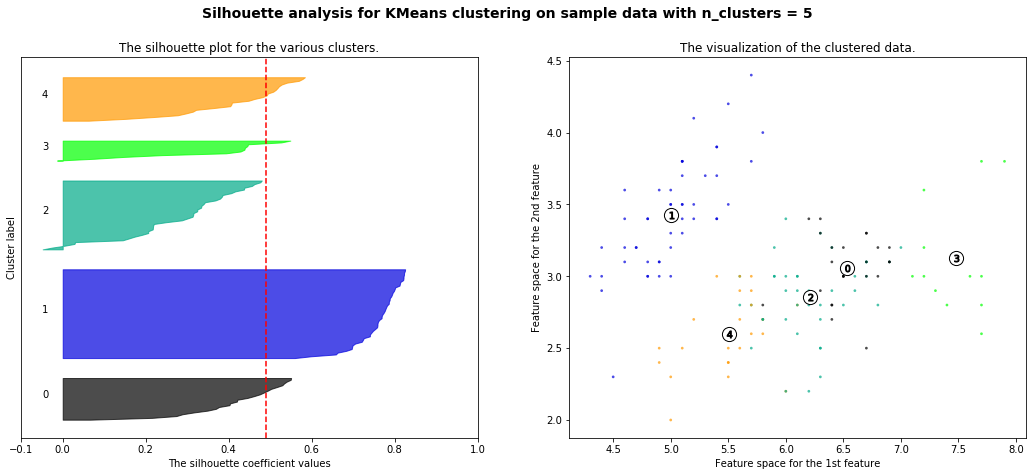

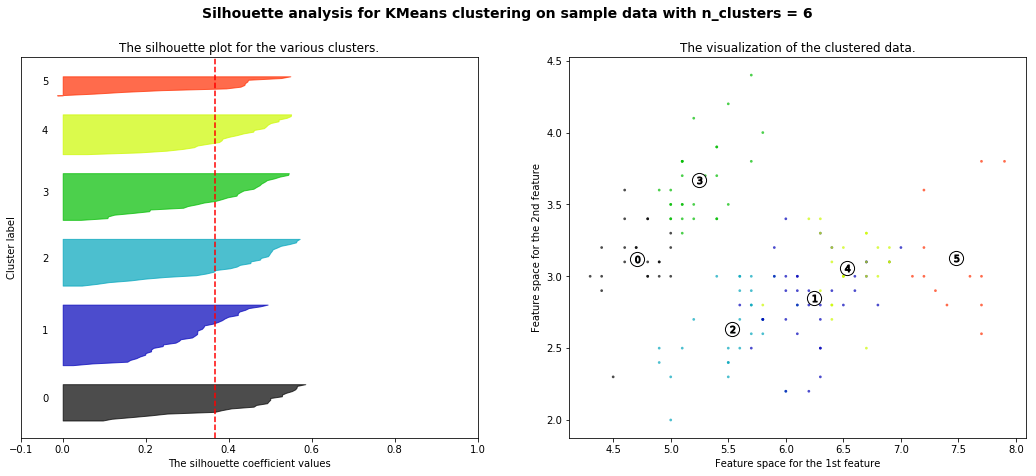

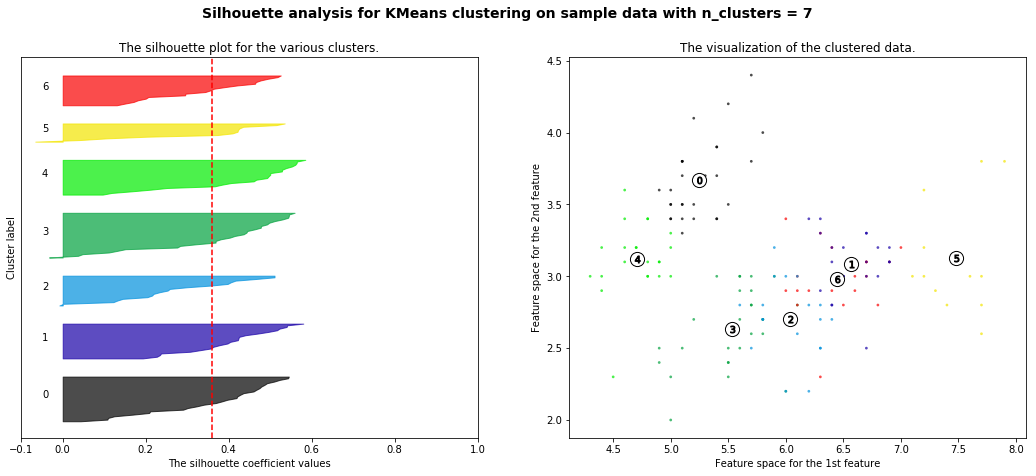

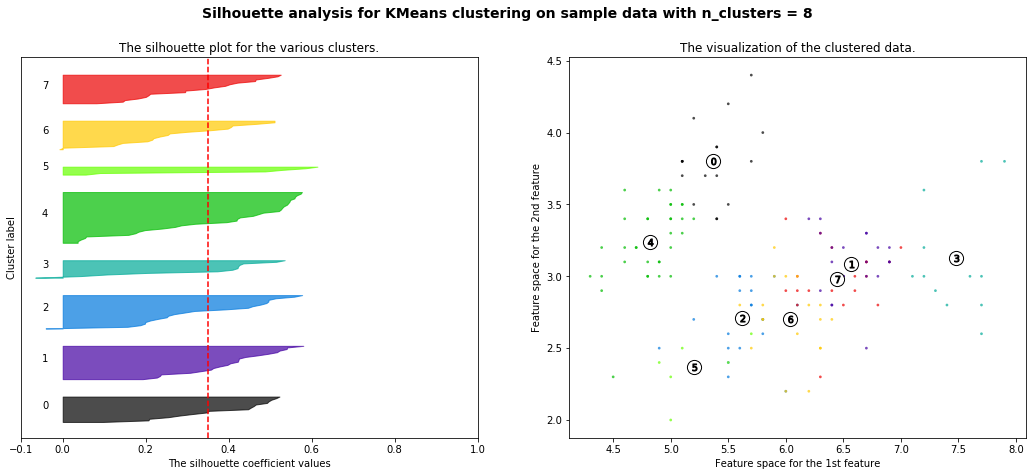

In [3]:
for n_clusters in range_n_clusters:
    # 1 row , 2 columns
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    
    estimator = KMeans(n_clusters = n_clusters, random_state = 10)
    cluster_labels = estimator.fit_predict(x)
    
    #calculate the mean silhouette values of all points
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(f' For n_clusters = {n_clusters} , The average silhouette_score = {silhouette_avg}')
    
    #calculate the silhouette score of every single point
    sample_silhouette_vals = silhouette_samples(x, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_vals = sample_silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()
        
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0 ,
                         ith_cluster_silhouette_vals, facecolor = color,
                         edgecolor = color , alpha = 0.7)
        
        #label every i value on each cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        #for next y_lower
        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0 , 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:,0] , x[:,1], marker = '.', s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = 'k')
    
    #draw circles for each cluster center
    centers = estimator.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], marker = 'o', c = 'white', alpha = 1, s = 200, edgecolor = 'k')
    
    for i,c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' %i , alpha = 1, s = 50, edgecolor = 'k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

# 分析結果解說
觀察輸出值 : silhouette_score, 如果是一個適合的分群值, 應該要比下一個分群值的分數大很多 <br />
由結果可以看出 : 2, 3, 5 都是不錯的分群值(因為比 3, 4, 6的分數都高很多), 相形之下, 4, 6, 7 作為分群的效果就不明顯

# K-Mean 觀察 : 使用輪廓分析
# [作業目標]
試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較<br />
# [作業重點]
使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化<br />
# 作業
試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果

In [9]:
x, y = datasets.make_blobs(n_samples = 500,
                                       n_features = 2,
                                       centers = 5,
                                       cluster_std = 1,
                                       center_box = (-10, 10),
                                       shuffle = True,
                                       random_state = 123)

range_n_clusters = [2,3,4,5,6,7,8]

In [14]:
#Let check the data first
print(x.shape)
y[:10]

(500, 2)


array([3, 4, 3, 2, 3, 2, 4, 3, 0, 0])

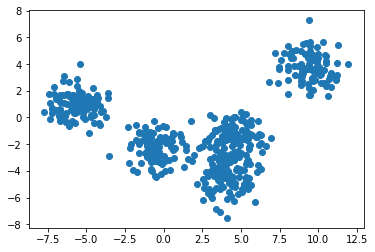

In [17]:
plt.scatter(x[:,0], x[:,1])
plt.show()

 silhouette score for 2 clusters : 0.681046169211746
 sample size : 150
 silhouette score for 3 clusters : 0.5528190123564091
 sample size : 150
 silhouette score for 4 clusters : 0.4980505049972866
 sample size : 150
 silhouette score for 5 clusters : 0.4887488870931048
 sample size : 150
 silhouette score for 6 clusters : 0.3648340039670018
 sample size : 150
 silhouette score for 7 clusters : 0.3566882476581684
 sample size : 150
 silhouette score for 8 clusters : 0.35974549238457515
 sample size : 150


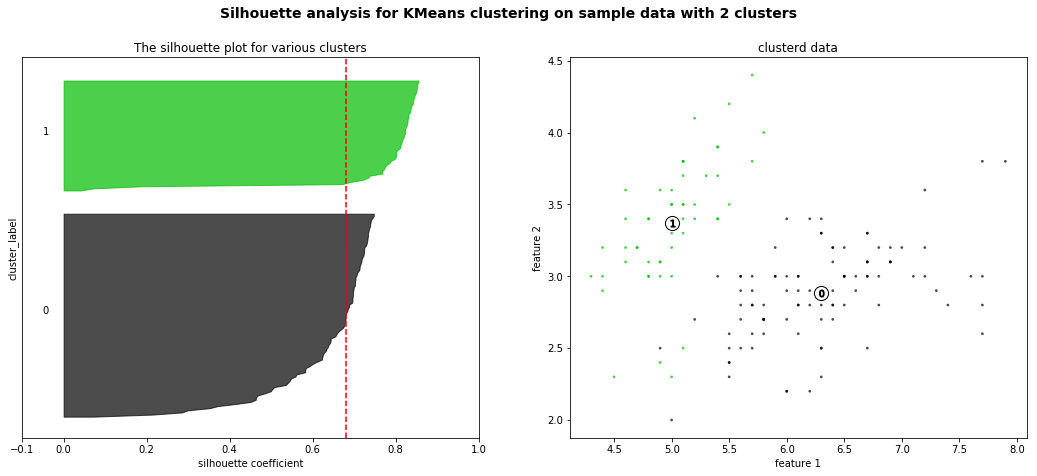

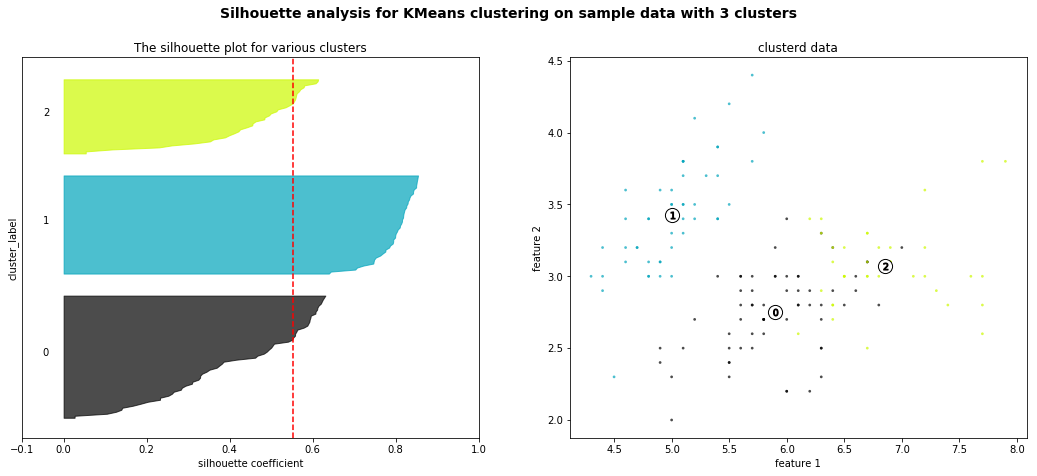

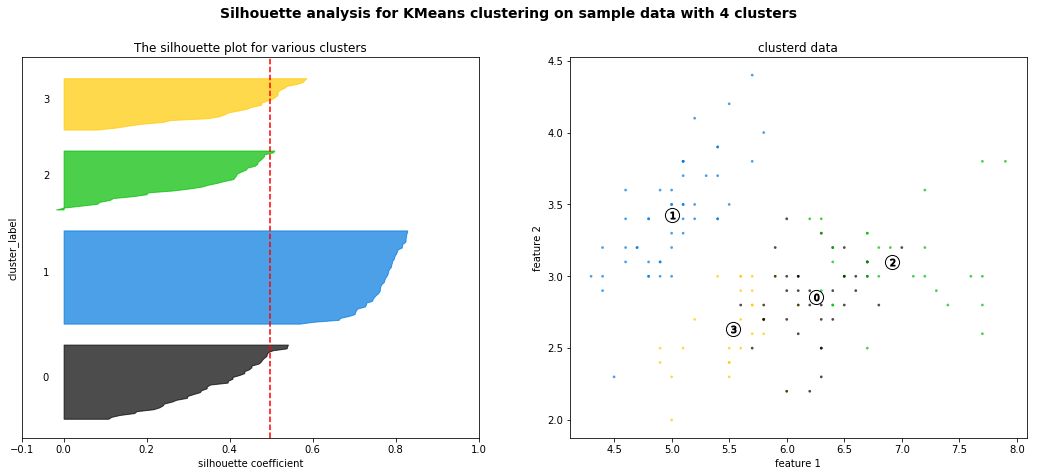

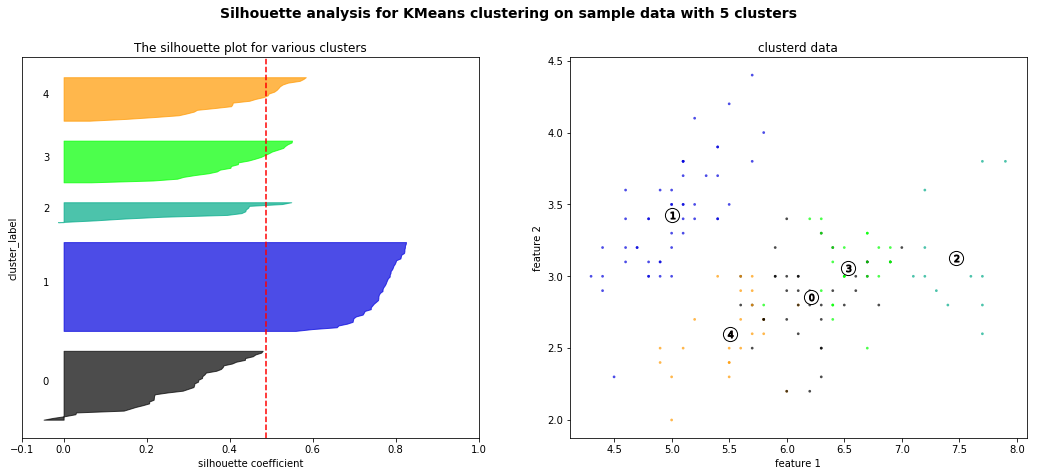

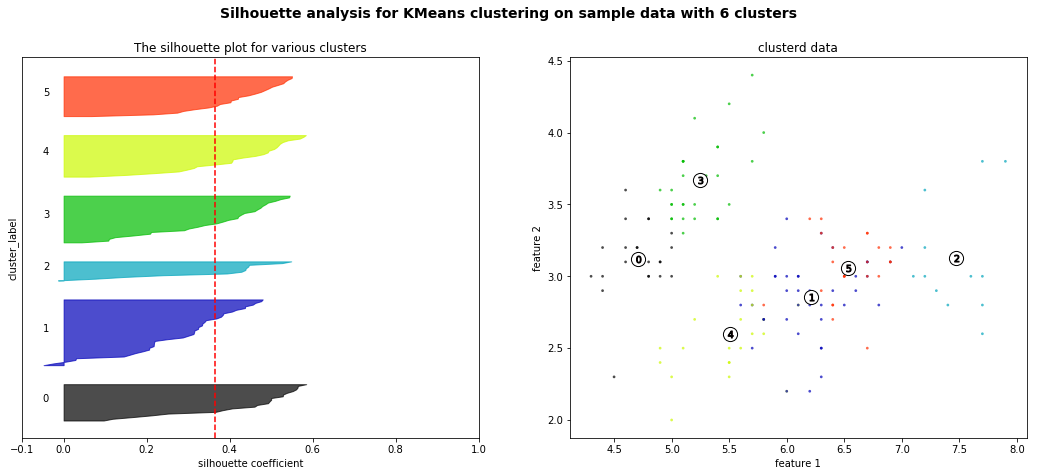

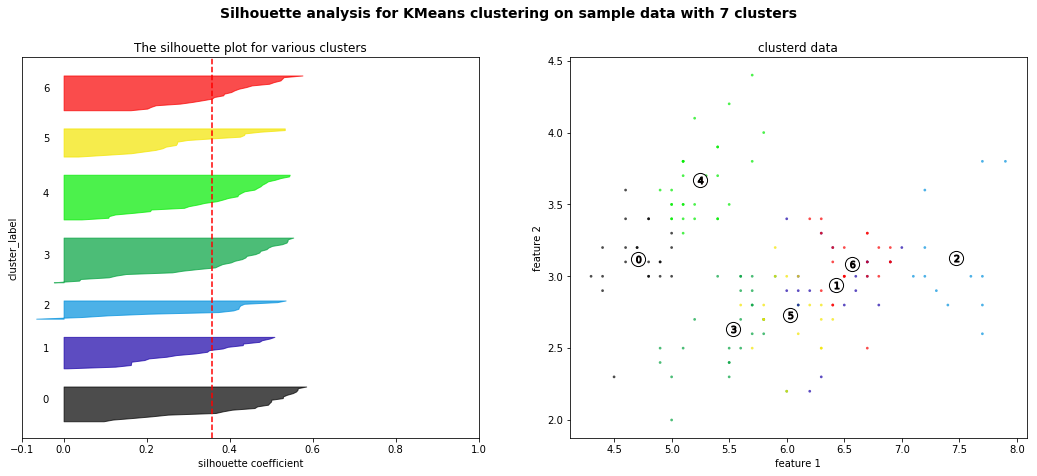

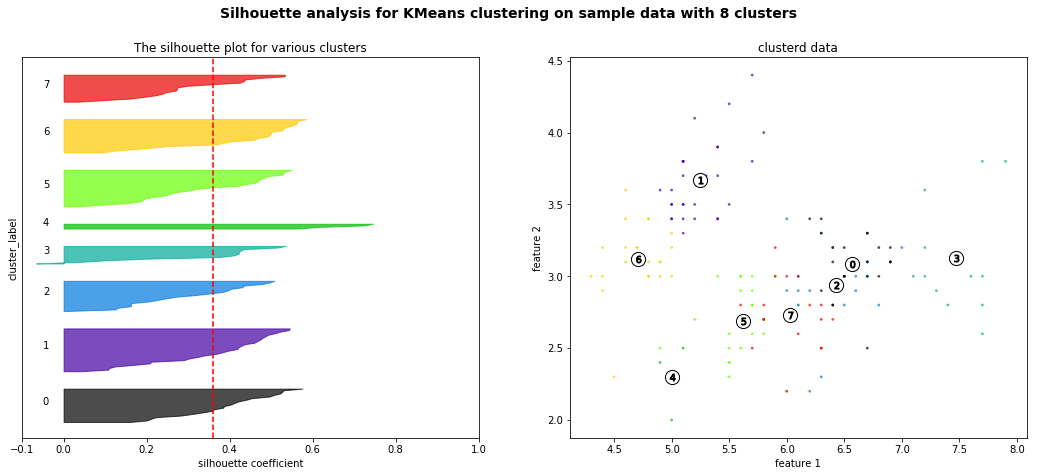

In [9]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(x) + (n_clusters+1) * 10])
    
    estimator = KMeans(n_clusters = n_clusters, random_state = 2019)
    labels = estimator.fit_predict(x)
    
    ss_avg = silhouette_score(x, labels)
    
    print(f' silhouette score for {n_clusters} clusters : {ss_avg}')
    sample_s_vals = silhouette_samples(x, labels)
    
    print(f' sample size : {len(sample_s_vals)}')
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_s_vals = sample_s_vals[i == labels]
        ith_cluster_s_vals.sort()
        
        ith_cluster_size = len(ith_cluster_s_vals)
        y_upper = y_lower + ith_cluster_size
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx( np.arange(y_lower, y_upper), 0, ith_cluster_s_vals, facecolor = color, edgecolor = color, alpha = 0.7)
        ax1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for various clusters")
    ax1.set_xlabel('silhouette coefficient')
    ax1.set_ylabel('cluster_label')
        
    ax1.axvline( x = ss_avg, color = 'red', linestyle = '--')
        
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        
    colors = cm.nipy_spectral(labels.astype(float)/n_clusters)
    ax2.scatter(x[:,0], x[:,1], marker = '.', s = 30 , lw=0, alpha = 0.7, c = colors, edgecolor = 'k' )
    centers = estimator.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1], marker = 'o', c = "white", alpha = 1, s=200, edgecolor = 'k')
    
    for i,c in enumerate(centers):
        ax2.scatter(c[0],c[1], marker = '$%d$' %i , alpha = 1 , color = 'red', s = 50, edgecolor = 'k')
    
    ax2.set_title('clusterd data')
    ax2.set_xlabel('feature 1')
    ax2.set_ylabel('feature 2')
    
    plt.suptitle(f'Silhouette analysis for KMeans clustering on sample data with {n_clusters} clusters', fontsize = 14, fontweight = 'bold')
plt.show()